
https://www.kaggle.com/datasets/ruckdent/benigh-malware-spam-xss-phishing-dataset?select=malware_urls.csv -Kaggle





#Preproccessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data=pd.read_csv('/content/drive/MyDrive/MalwareClassification/SeparateCSV\'s/benign_urls.csv')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/MalwareClassification/SeparateCSV\'s/XSS_urls.csv')
df3 = pd.read_csv('/content/drive/MyDrive/MalwareClassification/SeparateCSV\'s/phishing_urls.csv')
df4 = pd.read_csv('/content/drive/MyDrive/MalwareClassification/SeparateCSV\'s/spam_urls.csv')
df5 = pd.read_csv('/content/drive/MyDrive/MalwareClassification/SeparateCSV\'s/malware_urls.csv')

df = pd.concat([data, df2, df3, df4, df5, ], axis=0)

df.to_csv('combined.csv', index=False)
df.head(20)

,url,target
0,http://buzzfil.net/m/show-art/ils-etaient-loin...,0
1,http://hollywoodlife.com/2014/05/01/rihanna-ih...,0
2,http://interpark.com/displaycorner/FreeMarket....,0
3,http://fanpage.gr/family/gineka/%ce%b1%cf%85%c...,0
4,http://worldoftanks.ru/ru/content/guide/paymen...,0
5,http://serverfault.com/questions/682832/squid-...,0
6,http://icicibank.com/Personal-Banking/offers/o...,0
7,http://motthegioi.vn/the-gioi-cuoi/clip-dai-gi...,0
8,https://twitter.com/home?status=%E3%83%8C%E3%8...,0
9,http://correios.com.br/para-sua-empresa/comuni...,0


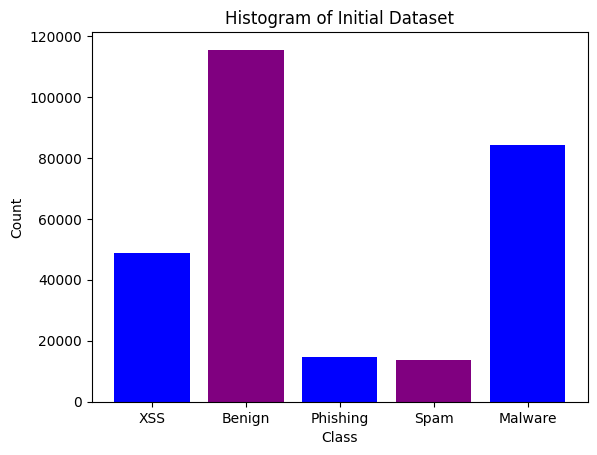

In [ ]:
import matplotlib.pyplot as plt

# Define the class names and their corresponding counts
class_counts = {
    'XSS': 48783,
    'Benign': 115454,
    'Phishing': 14673,
    'Spam': 13701,
    'Malware':84240,
}

# Extract the class names and counts into separate lists
class_names = list(class_counts.keys())
class_values = list(class_counts.values())

# Define the colors for each class
class_colors = ['blue', 'purple', 'blue', 'purple']

# Create a bar plot with the class names on the x-axis and the counts on the y-axis
plt.bar(class_names, class_values, color=class_colors)

# Set the x-axis and y-axis labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Initial Dataset')

# Show the plot
plt.show()


In [ ]:
df.target.value_counts()

1    115454
2     84240
0     48783
3     14673
4     13701
Name: target, dtype: int64

Go zemam brojot na vrednosti od klasata shto ima najmalku, vo ovoj sluchaj 4.

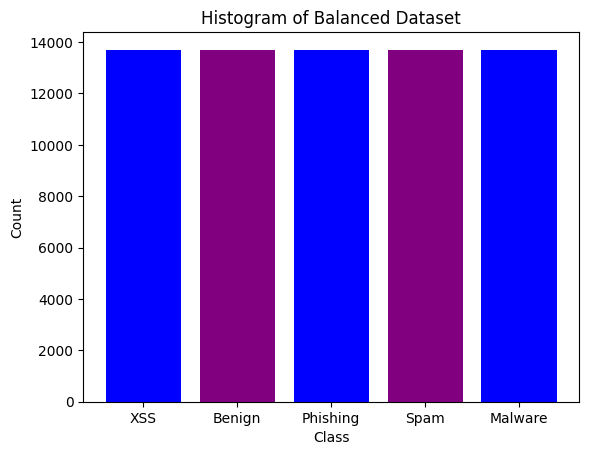

In [ ]:
import matplotlib.pyplot as plt

# Define the class names and their corresponding counts
class_counts = {
    'XSS': 13701,
    'Benign': 13701,
    'Phishing': 13701,
    'Spam': 13701,
    'Malware':13701,
}

# Extract the class names and counts into separate lists
class_names = list(class_counts.keys())
class_values = list(class_counts.values())

# Define the colors for each class
class_colors = ['blue', 'purple', 'blue', 'purple','blue']

# Create a bar plot with the class names on the x-axis and the counts on the y-axis
plt.bar(class_names, class_values, color=class_colors)

# Set the x-axis and y-axis labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Balanced Dataset')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np


counts = df['target'].value_counts()

min_count = min(counts)

undersampled_data = []

for c in counts.index:
    class_data = df[df['target'] == c].sample(min_count, random_state=42)
    undersampled_data.append(class_data)

df_undersampled = pd.concat(undersampled_data)

df_undersampled = df_undersampled.sample(frac=1, random_state=42)
df_undersampled.to_csv('final.csv')


In [ ]:
#Zemeni 2000 samo za pobrzo izvrshuvanje za testiranje

import pandas as pd
import numpy as np


counts = df['target'].value_counts()

min_count = min(counts)

undersampled_data = []

for c in counts.index:
    class_data = df[df['target'] == c].sample(min_count, random_state=42)
    undersampled_data.append(class_data)

df_undersampled = pd.concat(undersampled_data)

df_undersampled = df_undersampled.sample(frac=1, random_state=42)
df_undersampled.to_csv('final.csv')

In [ ]:
df_undersampled.target.value_counts()

3    13701
2    13701
4    13701
0    13701
1    13701
Name: target, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/final.csv')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)





In [ ]:
print("Test Data: " )
test_df.target.value_counts()

Test Data: 


3    2778
4    2758
1    2733
2    2718
0    2714
Name: target, dtype: int64

In [ ]:
print("Train Data: " )
train_df.target.value_counts()

Train Data: 


0    10987
2    10983
1    10968
4    10943
3    10923
Name: target, dtype: int64

#Model

In [ ]:
!pip install transformers==4.28.0
!pip install datasets
import numpy as np
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer, RobertaForSequenceClassification,AutoModelForSequenceClassification
from datasets import load_dataset, load_metric


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 67.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transformers-4.29.2:
      Successfully uninstalled transformers-4.29.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

df = pd.read_csv('final.csv')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


tokenizer = AutoTokenizer.from_pretrained('roberta-base')
train_encodings = tokenizer(train_df['url'].tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_df['url'].tolist(), truncation=True, padding=True)

# Convert labels to integers
label_to_id = {label: i for i, label in enumerate(train_df['target'].unique())}
train_labels = [label_to_id[label] for label in train_df['target']]
test_labels = [label_to_id[label] for label in test_df['target']]

train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask'], 'labels': train_labels})
test_dataset = Dataset.from_dict({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask'], 'labels': test_labels})

# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_to_id))

# Define the training arguments
train_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=train_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)








Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

#Training

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,0.033100,0.057834
2,0.098600,0.041234
3,0.051500,0.040699


TrainOutput(global_step=10278, training_loss=0.06487976009880697, metrics={'train_runtime': 16263.2425, 'train_samples_per_second': 10.109, 'train_steps_per_second': 0.632, 'total_flos': 4.325978003879117e+16, 'train_loss': 0.06487976009880697, 'epoch': 3.0})

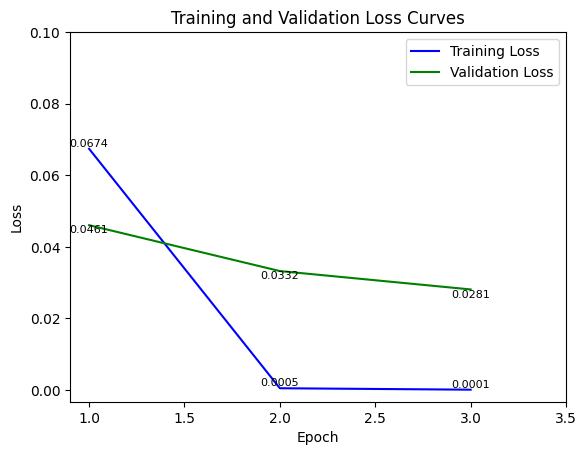

In [ ]:
import matplotlib.pyplot as plt

# Define the epoch numbers, training loss, and validation loss
epochs = [1, 2, 3]
train_loss = [0.067400, 0.000500, 0.000100]
val_loss = [0.046056, 0.033240, 0.028107]

# Plot the training and validation loss curves
plt.plot(epochs, train_loss, color='blue', label='Training Loss')
plt.plot(epochs, val_loss, color='green', label='Validation Loss')

# Set the x-axis and y-axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')

# Set the x and y ticks
plt.xticks([1.0, 1.5,2.0, 2.5, 3.0,3.5])
plt.yticks([0.0, 0.02, 0.04, 0.06, 0.08,0.10])

# Add a legend to the plot
plt.legend()

plt.legend()

# Add labels with numbers on the curves
for i, loss in enumerate(train_loss):
    plt.text(epochs[i], loss, f'{loss:.4f}', ha='center', va='bottom',fontsize=8)
for i, loss in enumerate(val_loss):
    plt.text(epochs[i], loss, f'{loss:.4f}', ha='center', va='top',fontsize=8)

# Show the plot
plt.show()


#Results

In [ ]:
y_pred = trainer.predict(test_dataset)

In [ ]:
predictions = []
for i in y_pred[0]:

  predictions.append(i.argmax().item())

In [ ]:
predictions

[0,
 4,
 2,
 0,
 3,
 4,
 0,
 0,
 4,
 2,
 2,
 3,
 0,
 4,
 2,
 4,
 4,
 4,
 4,
 1,
 4,
 1,
 4,
 0,
 2,
 3,
 0,
 0,
 2,
 3,
 0,
 0,
 1,
 0,
 3,
 4,
 1,
 3,
 0,
 3,
 2,
 4,
 0,
 1,
 0,
 2,
 0,
 3,
 4,
 0,
 0,
 3,
 1,
 3,
 0,
 4,
 4,
 1,
 3,
 2,
 1,
 2,
 1,
 2,
 4,
 2,
 2,
 1,
 1,
 1,
 4,
 4,
 3,
 1,
 1,
 1,
 3,
 4,
 0,
 3,
 4,
 0,
 4,
 1,
 0,
 2,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 0,
 1,
 1,
 3,
 2,
 3,
 2,
 0,
 4,
 1,
 4,
 0,
 0,
 0,
 4,
 1,
 3,
 1,
 0,
 4,
 0,
 2,
 3,
 3,
 3,
 2,
 0,
 0,
 2,
 1,
 3,
 0,
 3,
 1,
 4,
 4,
 4,
 4,
 1,
 3,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 3,
 2,
 1,
 1,
 0,
 3,
 1,
 0,
 1,
 0,
 4,
 2,
 0,
 2,
 4,
 3,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 4,
 2,
 0,
 4,
 3,
 4,
 4,
 0,
 4,
 4,
 2,
 4,
 3,
 0,
 0,
 3,
 2,
 2,
 2,
 4,
 1,
 2,
 1,
 4,
 3,
 3,
 1,
 2,
 1,
 0,
 2,
 3,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 4,
 3,
 2,
 3,
 1,
 4,
 3,
 0,
 4,
 2,
 1,
 1,
 0,
 2,
 1,
 3,
 4,
 2,
 2,
 4,
 1,
 4,
 4,
 1,
 2,
 4,
 0,
 4,
 4,
 0,
 0,
 1,
 0,
 3,
 3,
 4,
 4,
 1,
 3,
 3,
 0,
 1,


In [ ]:
import pandas as pd

y = test_dataset['labels']
y

[0,
 4,
 2,
 0,
 3,
 4,
 0,
 0,
 4,
 2,
 2,
 3,
 0,
 4,
 2,
 4,
 4,
 4,
 4,
 1,
 4,
 1,
 4,
 0,
 2,
 3,
 0,
 0,
 2,
 3,
 0,
 0,
 1,
 0,
 3,
 4,
 1,
 3,
 0,
 3,
 2,
 4,
 0,
 1,
 0,
 2,
 0,
 3,
 4,
 0,
 0,
 3,
 1,
 3,
 0,
 4,
 4,
 1,
 3,
 2,
 1,
 2,
 1,
 2,
 4,
 2,
 2,
 1,
 1,
 1,
 4,
 4,
 3,
 1,
 1,
 1,
 3,
 4,
 0,
 3,
 4,
 0,
 4,
 1,
 0,
 2,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 0,
 1,
 1,
 3,
 2,
 3,
 2,
 0,
 4,
 1,
 4,
 0,
 0,
 0,
 4,
 1,
 3,
 1,
 0,
 4,
 0,
 2,
 3,
 3,
 3,
 2,
 0,
 0,
 2,
 1,
 3,
 0,
 3,
 1,
 4,
 4,
 4,
 4,
 1,
 3,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 3,
 2,
 1,
 1,
 0,
 3,
 1,
 0,
 1,
 0,
 4,
 2,
 0,
 2,
 4,
 3,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 4,
 2,
 0,
 4,
 3,
 4,
 4,
 0,
 4,
 4,
 2,
 4,
 3,
 0,
 0,
 3,
 2,
 2,
 2,
 4,
 1,
 2,
 1,
 4,
 3,
 3,
 1,
 2,
 1,
 0,
 2,
 3,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 4,
 3,
 2,
 3,
 1,
 4,
 3,
 0,
 4,
 2,
 1,
 1,
 0,
 2,
 1,
 3,
 4,
 2,
 2,
 4,
 1,
 4,
 4,
 1,
 2,
 4,
 0,
 4,
 4,
 0,
 0,
 1,
 0,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 0,
 1,


In [ ]:
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,recall_score,confusion_matrix,classification_report


print('F1-score: ' , f1_score(y,predictions, average='weighted'))
print('Accuracy: ' , accuracy_score(y,predictions))

print('Confusion matrix:')
print(confusion_matrix(y,predictions))
print('----------')
print('Classification report:')
print(classification_report(y,predictions))

F1-score:  0.9933571434040036
Accuracy:  0.993358149040216
Confusion matrix:
[[2697    0    7    2   12]
 [   1 2758    1    0   18]
 [   1    1 2712    0    0]
 [   3    0    0 2748    7]
 [  14   18    3    3 2695]]
----------
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2718
           1       0.99      0.99      0.99      2778
           2       1.00      1.00      1.00      2714
           3       1.00      1.00      1.00      2758
           4       0.99      0.99      0.99      2733

    accuracy                           0.99     13701
   macro avg       0.99      0.99      0.99     13701
weighted avg       0.99      0.99      0.99     13701

